## Extracting Text from different file sources.

* Image
* PDF
* DOCX

In [17]:
!pip install "numpy<2"


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
!pip install "pandas<2"

  Using cached pandas-1.5.3.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: still running...
  Getting requirements to build wheel: still running...
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pandas


  error: subprocess-exited-with-error
  
  × Building wheel for pandas (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [2527 lines of output]
      <string>:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
      C:\Users\cp24c\AppData\Local\Temp\pip-build-env-7a6x9bon\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
      !!
      
              ********************************************************************************
              Please consider removing the following classifiers in favor of a SPDX license expression:
      
              License :: OSI Approved :: BSD License
      
              See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
         

#### Extracting Text from Images
OCR (Optical Character Recognition)

In [19]:
pip install pytesseract opencv-python==4.8.1.78

  Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl (38.1 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'd:\\MOM-generator\\.venv\\Lib\\site-packages\\cv2\\cv2.pyd'
Check the permissions.


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import pytesseract
import cv2
import matplotlib.pyplot as plt

print("pytesseract OK")
print("OpenCV version:", cv2.__version__)
print("matplotlib OK")


pytesseract OK
OpenCV version: 4.11.0
matplotlib OK


In [21]:
import pytesseract
import cv2
import matplotlib.pyplot as plt

In [22]:
# lets Load and Process the image
image = cv2.imread('Capture1.PNG') # Load the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # To convert BGR to RGB
image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # To convert BGR to Grey
_,image_bw = cv2.threshold(image_grey,120,255,cv2.THRESH_BINARY) # To convert Grey to Black and White

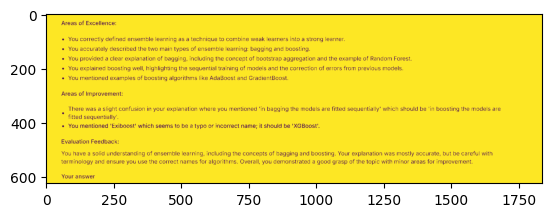

In [23]:
plt.imshow(image_bw)

In [24]:
# cv2.imshow not supported in headless environment
# cv2.imshow('Grey Image', image_bw)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [25]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe' # Path where Tesseract is installed

In [26]:
print(pytesseract.image_to_string(image_bw))

Areas of Excellence:

« You correctly defined ensemble learning as a technique to combine weak learners into a strong learner.

« You accurately described the two main types of ensemble learning: bagging and boosting.

« You provided a clear explanation of bagging, including the concept of bootstrap aggregation and the example of Random Forest.
« You explained boosting well, highlighting the sequential training of models and the correction of errors from previous models.

« You mentioned examples of boosting algorithms like AdaBoost and GradientBoost.

Areas of Improvement:

There was a slight confusion in your explanation where you mentioned ‘in bagging the models are fitted sequentially’ which should be ‘in boosting the models are
.
fitted sequentially’.
« You mentioned 'Exiboost' which seems to be a typo or incorrect name; it should be 'XGBoost’.
Evaluation Feedback:
You have a solid understanding of ensemble learning, including the concepts of bagging and boosting. Your explanation

Note:

* tesseract is working fine when we have a clear image with typed characters. But as we are giving any image of handwritten notes the text that is extracting is not good enough.

* Lets try another approach and use LLM model as OCR, we will compare the results and see.

In [27]:
import google.generativeai as genai
import cv2
from PIL import Image
import os

In [28]:
key = os.getenv("GOOGLE_API_KEY")
genai.configure(api_key=key)

In [38]:
model = genai.GenerativeModel('gemini-2.5-flash-lite')

In [30]:
prompt = '''You act as an OCR application on the given image and extract the text from it.
            Give only the text as output, do not give any other explanation or description.'''

In [31]:
# lets Load and Process the image
image = cv2.imread('notes.jpg') # Load the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # To convert BGR to RGB
image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # To convert BGR to Grey
_,image_bw = cv2.threshold(image_grey,150,255,cv2.THRESH_BINARY) # To convert Grey to Black and Whit

In [32]:
# The image that CV2 gives is in numpy array format, we need to convert it to image object
final_image = Image.fromarray(image_bw) 

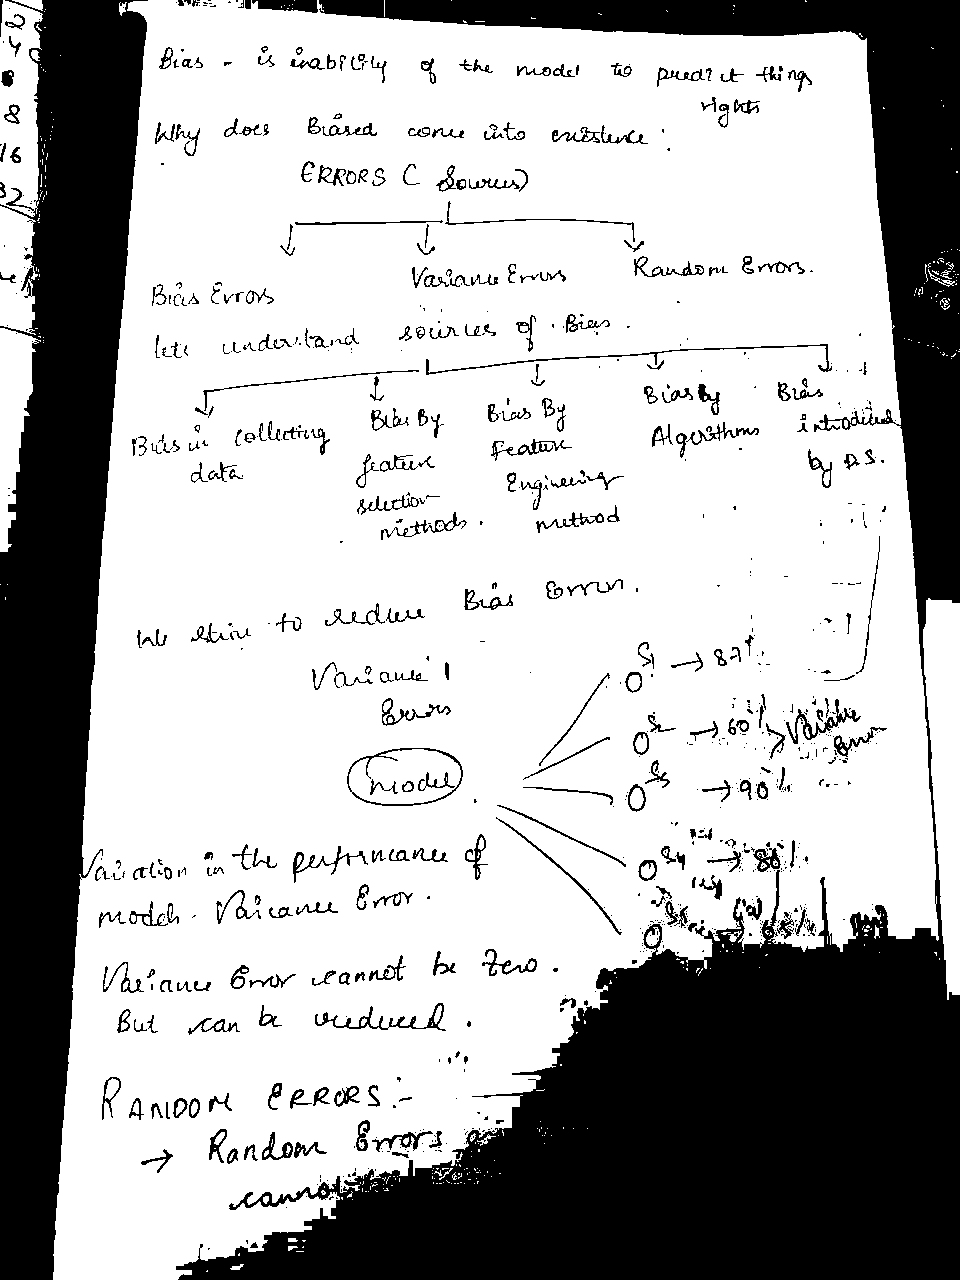

In [33]:
final_image

In [34]:
response = model.generate_content([prompt,final_image])
output_text = response.text
print(output_text)

Bias - is inability of the model to predict things
Right
Why does Biased come into existence?
ERRORS C Sources)
↓
Bias Errors
Variance Errors
Random Errors.
lets understand Sources of Bias.
↓
↓
↓
↓
Bias in collecting Bias By Bias By Bias By
data feature feature Algorithms Introduced
selection Engineering by AS.
methods. method

We strive to reduce Bias Error.
Variance |
Errors
(model)
Variation in the performance of
model. Variance Error.
Variance Error cannot be zero.
But can be reduced.
RANDOM ERRORS :-
→ Random Errors
cannot
0.5-87%
0.65-60% Variable
075 - 90%
0.84-88%
099 - (2%)


In [48]:
# Save Google AI extracted text
with open('outputs/extracted_google_ai.txt', 'w', encoding='utf-8') as f:
    f.write(output_text)
print("Google AI text saved to outputs/extracted_google_ai.txt")

Google AI text saved to outputs/extracted_google_ai.txt


Note:

OCR Based on LLM model seems to be a better option to extrcat text even from handwritten notes. It may not be able to extrcat 100% but still its giving better output than tesseract.

## Extract Text from DOCX (Word Document)

In [35]:
## Extract Text from PDF

In [36]:
from pypdf import PdfReader

In [44]:
# Read the PDF file (replace 'sample.pdf' with your PDF file)
pdf_file = 'sample.pdf'
if os.path.exists(pdf_file):
    pdf_reader = PdfReader(pdf_file)
    pdf_text = ''
    for page in pdf_reader.pages:
        pdf_text += page.extract_text()
    print("PDF text extracted.")
else:
    pdf_text = "PDF file not found. Please place a PDF file in the directory."
    print(pdf_text)

PDF file not found. Please place a PDF file in the directory.


In [ ]:
print(pdf_text)
# Save PDF text if extracted
if pdf_text and not pdf_text.startswith("PDF file not found"):
    with open('outputs/extracted_pdf.txt', 'w', encoding='utf-8') as f:
        f.write(pdf_text)
    print("PDF text saved to outputs/extracted_pdf.txt")

PDF file not found. Please place a PDF file in the directory.


In [ ]:
# pip install python-docx

In [ ]:
from docx import Document

In [ ]:
# Lets read the docx file
file = Document('stats.docx')

In [ ]:
text_extacted = ' '.join([p.text for p in file.paragraphs])

In [ ]:
print(text_extacted)

STATISTICS   Descriptive Statistics 1. What is the difference between population and sample? Population refers to the entire group being studied, while a sample is a subset of the population used for analysis. 2. What are mean, median, and mode? Mean: The average of all values. Median: The middle value when arranged in order. Mode: The most frequently occurring value. 3. What is the difference between variance and standard deviation? Variance measures how far data points are from the mean, squared. Standard deviation is the square root of variance, making it more interpretable in the same units as the data. 4. What are skewness and kurtosis? Skewness: Measures the asymmetry of the data distribution. Positive skew → right tail is longer. Negative skew → left tail is longer. Kurtosis: Measures the "tailedness" of the distribution. High kurtosis → more outliers (leptokurtic). Low kurtosis → fewer outliers (platykurtic). 5. What is the difference between a parameter and a statistic? Parame

In [47]:
# Save DOCX text
with open('outputs/extracted_docx.txt', 'w', encoding='utf-8') as f:
    f.write(text_extacted)
print("DOCX text saved to outputs/extracted_docx.txt")

DOCX text saved to outputs/extracted_docx.txt


In [ ]:
## Generate Minutes of Meeting (MOM) from Extracted Text

In [43]:
import os
if not os.path.exists('outputs'):
    os.makedirs('outputs')
print("Outputs directory created.")

Outputs directory created.


In [40]:
mom_prompt = '''Assume you are expert in creating minutes of meeting. User has provided
notes of meeting in text format. Using this data you need to create a standardized
minutes of meeting for the user.

Output must follow word/docx format, strictly in the following manner:
title : Title of meeting
Heading : Meeting Agenda
subheading : Name of attendees (If attendees name is not there keep it NA)
subheading : date of meeting and place of meeting (place means name of conference /meeting room if not provided keep it online)
Body: The body must follow the following sequence of points
* Key points discussed
* Highlight any decision that has been finalised.
* mention actionable items.
* Any additional notes.
* Any deadline that has been discussed.
* Any next meeting date that has been discussed.
* 2 to 3 line of summary.
* Use bullet points and highlight or bold important keywords such the context is clear.
* Generate the output in such a format that it can can be copied and paste in word and create pdf.'''

In [41]:
# Use the extracted text (e.g., from Google AI or DOCX)
meeting_notes = output_text  # or text_extacted for DOCX

mom_response = model.generate_content([mom_prompt, meeting_notes])
mom_output = mom_response.text
print(mom_output)

```
Title: Understanding Bias and Errors in Machine Learning Models

Heading: Meeting Agenda

*   **Name of Attendees:** NA
*   **Date of Meeting and Place of Meeting:** Online

Body:

*   **Key points discussed:**
    *   The core of the discussion revolved around the concept of **bias** in machine learning models and its genesis.
    *   It was explained that **bias** is an inability of the model to predict things correctly.
    *   The sources of **bias** were elaborated, identifying them as occurring during data collection, feature selection, feature engineering, and also by the algorithms themselves.
    *   The discussion also touched upon **variance errors** (model-dependent variation in performance) and **random errors**.
    *   It was emphasized that **variance error** cannot be eliminated but can be reduced.
    *   **Random errors** were also discussed, with examples of performance metrics illustrating their presence and variability.

*   **Decisions finalised:**
    *   Th

In [49]:
# Save the MOM to a file in outputs directory
with open('outputs/generated_mom.txt', 'w', encoding='utf-8') as f:
    f.write(mom_output)
print("MOM saved to outputs/generated_mom.txt")

MOM saved to outputs/generated_mom.txt


In [ ]:
## Additional Feature: Summarize Extracted Text

In [50]:
summary_prompt = "Summarize the following meeting notes in 2-3 sentences:"

# Summarize the Google AI extracted text
summary_response = model.generate_content([summary_prompt, output_text])
summary = summary_response.text
print("Summary:", summary)

# Save summary
with open('outputs/summary.txt', 'w', encoding='utf-8') as f:
    f.write(summary)
print("Summary saved to outputs/summary.txt")

Summary: This meeting summarized that bias in models refers to their inability to predict accurately. Bias arises from various errors in data collection, feature engineering, and algorithms, while variance errors reflect model performance variation that cannot be eliminated but can be reduced. Random errors, distinct from bias and variance, are inherent and cannot be removed.
Summary saved to outputs/summary.txt


In [ ]:
## More Features: Combine Extracted Texts and Advanced MOM Generation

In [51]:
# Combine all extracted texts
combined_text = ""
if 'text_extacted' in locals() and text_extacted:
    combined_text += "DOCX Text:\n" + text_extacted + "\n\n"
if 'output_text' in locals() and output_text:
    combined_text += "Google AI Text:\n" + output_text + "\n\n"
if 'pdf_text' in locals() and pdf_text and not pdf_text.startswith("PDF file not found"):
    combined_text += "PDF Text:\n" + pdf_text + "\n\n"

print("Combined Text Length:", len(combined_text))
# Save combined text
with open('outputs/combined_text.txt', 'w', encoding='utf-8') as f:
    f.write(combined_text)
print("Combined text saved to outputs/combined_text.txt")

Combined Text Length: 14190
Combined text saved to outputs/combined_text.txt


In [52]:
# Generate MOM from combined text
if combined_text:
    combined_mom_response = model.generate_content([mom_prompt, combined_text])
    combined_mom = combined_mom_response.text
    print("Combined MOM generated.")
    # Save combined MOM
    with open('outputs/combined_mom.txt', 'w', encoding='utf-8') as f:
        f.write(combined_mom)
    print("Combined MOM saved to outputs/combined_mom.txt")
else:
    print("No text to combine for MOM generation.")

Combined MOM generated.
Combined MOM saved to outputs/combined_mom.txt


In [ ]:
## Feature: Compare OCR Methods

In [53]:
# Compare Tesseract and Google AI outputs
tesseract_text = pytesseract.image_to_string(image_bw) if 'image_bw' in locals() else "Tesseract not run"
google_text = output_text if 'output_text' in locals() else "Google AI not run"

comparison = f"Tesseract Output:\n{tesseract_text}\n\nGoogle AI Output:\n{google_text}"
print("Comparison:")
print(comparison[:500] + "..." if len(comparison) > 500 else comparison)

# Save comparison
with open('outputs/ocr_comparison.txt', 'w', encoding='utf-8') as f:
    f.write(comparison)
print("Comparison saved to outputs/ocr_comparison.txt")

Comparison:
Tesseract Output:
Bras - & abi Fly % the renee

hiy cots Biased conse dato eubibuce * rights
) ERwors C dows
{
J t 1
Broa Evrars Vaso Eros Random &rvors.
fete tradearrtand AOUNUS ‘| . ius.
a rr ae re
" ’ Bia Bu.
Bus ue collection, Bus by. boa Be n 4
okie fotien Feat qos
fo Pagina
tal Ahr. ty adios : | '
Ss sat J

Ad ation ta Che peaprmane. ¢ ° “
prods Valen Err: Ne
Vartan ror ceannat he Re. ya .
but ran & Budlueed . ?


Google AI Output:
Bias - is inability of the model to predict things
Right
W...
Comparison saved to outputs/ocr_comparison.txt
